In [224]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [225]:
spy_data = yf.download(['SPY'], '2021-01-01', '2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [226]:
spy_close = spy_data[['Adj Close']]
spy_close['shifted_close'] = spy_close['Adj Close'].shift(1)
spy_close

/var/folders/d7/91dqyhp52fb8zsybsj849cyw0000gn/T/ipykernel_95375/693229522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy_close['shifted_close'] = spy_close['Adj Close'].shift(1)


,Adj Close,shifted_close
Date,,
2021-01-04,359.773254,NaN
2021-01-05,362.251099,359.773254
2021-01-06,364.416901,362.251099
2021-01-07,369.831177,364.416901
2021-01-08,371.938385,369.831177
...,...,...
2021-12-27,471.797485,465.213715
2021-12-28,471.411896,471.797485
2021-12-29,472.014954,471.411896


In [227]:
spy_returns = (spy_close['Adj Close'] - spy_close['shifted_close'])/(spy_close['shifted_close'])
spy_returns = spy_returns.iloc[1::]
spy_returns

Date
2021-01-05    0.006887
2021-01-06    0.005979
2021-01-07    0.014857
2021-01-08    0.005698
2021-01-11   -0.006741
                ...   
2021-12-27    0.014152
2021-12-28   -0.000817
2021-12-29    0.001279
2021-12-30   -0.002764
2021-12-31   -0.002520
Length: 251, dtype: float64

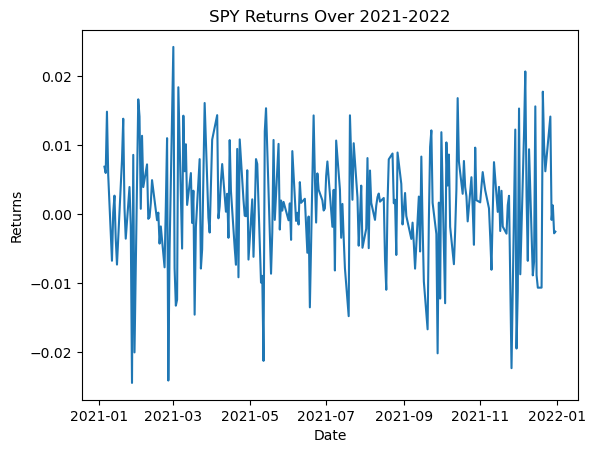

In [228]:
plt.plot(spy_returns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('SPY Returns Over 2021-2022')
plt.show()

# For Section on Volatility (Black-Scholes vs. Monte Carlo)

In [229]:
data = spy_returns.iloc[len(spy_returns)-10::]
data

Date
2021-12-17   -0.010643
2021-12-20   -0.010633
2021-12-21    0.017759
2021-12-22    0.009999
2021-12-23    0.006222
2021-12-27    0.014152
2021-12-28   -0.000817
2021-12-29    0.001279
2021-12-30   -0.002764
2021-12-31   -0.002520
dtype: float64

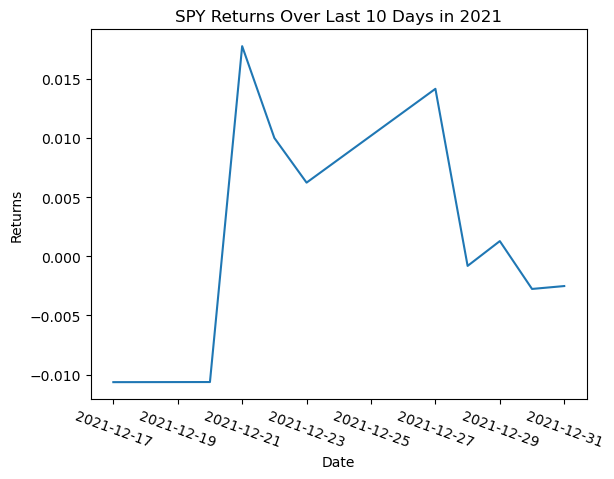

In [230]:
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('SPY Returns Over Last 10 Days in 2021')
plt.xticks(rotation=340)
plt.show()

In [231]:
# Calculation of return mean
mu_bar = 1/len(data) * data.sum()
mu_bar

0.0022032962231835086

In [232]:
# Calculation of $\sigma$
sigma = (((data - mu_bar)**2).sum()/len(data))**(1/2)
sigma

0.009211137403131543

In [233]:
# Convert to yearly volatility
y_sigma = sigma*252**(1/2)
y_sigma

0.1462222731643882

# Monte Carlo Simulation
(Nick: I'm going to code the monte carlo simulation since my part depends on this, so feel free to use this code in your part)


Example Application: Suppose the current price of an asset was $90.53 and in 60 trading days, a call option will expire with a strike of 100. Given that the volatility of the asset is .05, the drift is .1 and the risk-free rate is 0.037, use a Monte Carlo simulation to simulate the price of the option, then compare with the Black-Scholes equation.

In [234]:
def monte_carlo_pricer(N,trading_days_until_exp, sigma, k, r, s): 
    """
    N - Number of simulations
    trading_days_until_exp - Number of trading days
    sigma - Annualized volatility
    k - Strike price
    r - Nominal rate per period t
    s - Current spot price of underlying asset
    
    """
    prices = [np.array([s for _ in range(N)])]
    delta_t = 1/252
    for day in range(int(trading_days_until_exp)):
        # Generate a random number ~ N(0,1) for each simulation
        random_nums = np.random.randn(N)

        # Perform vectorized update based on the random numbers
        prices.append(prices[-1]*np.e**((r-(sigma**2)/2)*(delta_t)+sigma*random_nums*delta_t**(1/2)))
    
    plt.figure()
    plt.plot(prices)
    plt.show()
    
    # Calculate the price of the option
    yum = trading_days_until_exp/252 # Years Until Maturity
    call_option_price = np.e**(-r*yum)*(np.maximum(prices[-1] - k, np.zeros(len(prices[-1])))).mean()
    put_option_price = np.e**(-r*yum)*(np.maximum(k-prices[-1], np.zeros(len(prices[-1])))).mean()
    return {'call':call_option_price, 'put':put_option_price, 'prices':prices}


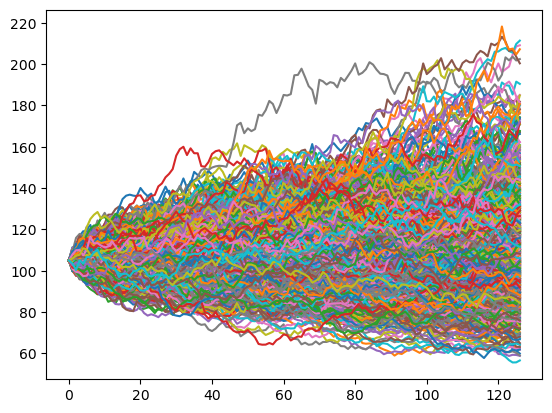

The calculated call option price is 14.600839127831998. The calculated put option price is 4.307668865032434.


In [235]:
res = monte_carlo_pricer(N=1000,trading_days_until_exp=252/2, sigma=0.3, k=100, r=0.1, s=105)
print(f"The calculated call option price is {res['call']}. The calculated put option price is {res['put']}.")

In [223]:
"""
Uncomment this code to run - it takes a long time.

Creates a graph of the price estimate by num simulations
"""
# simulated_prices = []
# for i in range(5, 10000, 100):
#     simulated_prices.append(monte_carlo_pricer(N=5000,trading_days_until_exp=252/2, sigma=0.3, k=100, r=0.1, s=105))

# plt.figure()
# plt.plot([x['call'] for x in simulated_prices])
# plt.title("Price Estimates of Monte Carlo Simulation by Number of Simulations")
# plt.show()

'\nUncomment this code to run - it takes a long time.\n\nCreates a graph of the price estimate by num simulations\n'

In [293]:
z = np.array([[.1, .2, .4, .6, .8],[.15, .27, .43, .64, .88], [.25, .37, .53, .74, .98]]).flatten()
t = [0, .25, .5, .75, 1]
s = [0.5, 1, 1.5]
x = [strike for strike in s for _ in t]
y = [time for _ in s for time in t]
print(x)
print(y)

[0.5, 0.5, 0.5, 0.5, 0.5, 1, 1, 1, 1, 1, 1.5, 1.5, 1.5, 1.5, 1.5]
[0, 0.25, 0.5, 0.75, 1, 0, 0.25, 0.5, 0.75, 1, 0, 0.25, 0.5, 0.75, 1]


In [294]:
from scipy.interpolate import interp2d

In [295]:
surface_interp = interp2d(x,y,z)
surface_interp(x=0.8,y=0.5)

array([0.2587112])

# Monte Carlo with Variable Volatility

In [296]:
def monte_carlo_pricer(N,trading_days_until_exp, 
                       volatility_surface, k, r, s): 
    """
    N - Number of simulations
    trading_days_until_exp - Number of trading days
    volatility_surface - Scipy output of interp2d
    k - Strike price
    r - Nominal rate per period t
    s - Current spot price of underlying asset
    
    """
    prices = [np.array([s for _ in range(N)])]
    delta_t = 1/252
    for day in range(int(trading_days_until_exp)):
        # Calculate implied volatility
        sigma = volatility_surface(
            k/s, trading_days_until_exp*delta_t)
        
        # Generate a random number ~ N(0,1) for each simulation
        random_nums = np.random.randn(N)

        # Perform vectorized update based on the random numbers
        prices.append(
            prices[-1]*np.e**((r-(sigma**2)/2)*(delta_t)+
                              sigma*random_nums*delta_t**(1/2)))
    
    plt.figure()
    plt.plot(prices)
    plt.show()
    
    # Calculate the price of the option
    yum = trading_days_until_exp/252 # Years Until Maturity
    call_option_price = np.e**(-r*yum)*(
        np.maximum(
            prices[-1] - k, np.zeros(len(prices[-1])))).mean()
    put_option_price = np.e**(-r*yum)*(
        np.maximum(k-prices[-1], np.zeros(len(prices[-1])))).mean()
    return {'call':call_option_price, 
            'put':put_option_price, 'prices':prices}


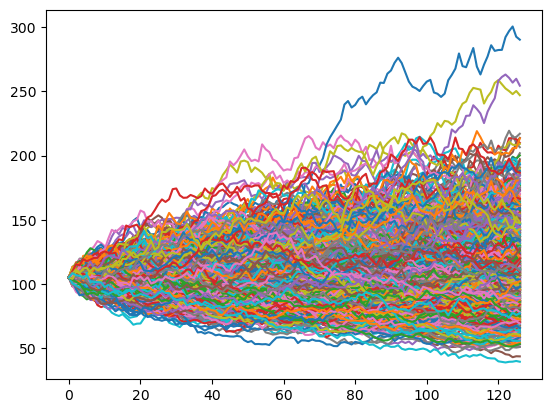

The calculated call option price is 17.01028350458464. The calculated put option price is 6.902791930819428.


In [297]:
res = monte_carlo_pricer(N=1000,trading_days_until_exp=252/2, volatility_surface=surface_interp, k=100, r=0.1, s=105)
print(f"The calculated call option price is {res['call']}. The calculated put option price is {res['put']}.")